In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Data Loading and Preprocessing

In [ ]:
df = pd.read_csv('./Dataset/Customer-Data - 2.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (8950, 18)

First 5 rows:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [39]:
print("Data Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nStatistical Summary:")
df.describe()

Data Types:
CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Missing Values:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOF

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204822,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634780,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [40]:
# Data Preprocessing

df_clustering = df.drop('CUST_ID', axis=1)

df_clustering = df_clustering.fillna(df_clustering.median())

print("Missing values after imputation:", df_clustering.isnull().sum().sum())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)

print("\nScaled data shape:", X_scaled.shape)
print("Features used for clustering:", list(df_clustering.columns))

Missing values after imputation: 0

Scaled data shape: (8950, 17)
Features used for clustering: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


## 2. Helper Functions for Evaluation and Visualization

In [41]:
def evaluate_clustering(X, labels, model_name="Model"):

    if len(set(labels)) < 2:
        return {"Model": model_name, "Silhouette": np.nan, "Calinski-Harabasz": np.nan, "Davies-Bouldin": np.nan}
    
    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    
    return {
        "Model": model_name,
        "Silhouette": round(silhouette, 4),
        "Calinski-Harabasz": round(calinski, 4),
        "Davies-Bouldin": round(davies_bouldin, 4)
    }

def visualize_clusters(X, labels, title, ax=None):
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, s=50)
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
    ax.set_title(title)
    plt.colorbar(scatter, ax=ax, label='Cluster')
    
    return ax


---
# Part 1: K-Means Clustering

K-Means is a centroid-based clustering algorithm that partitions data into k clusters by minimizing within-cluster variance.

**Parameters to experiment with:**
- `n_clusters`: Number of clusters
- `init`: Initialization method ('k-means++', 'random')
- `n_init`: Number of times the algorithm runs with different centroid seeds
- `max_iter`: Maximum number of iterations

### 1.1 Experimenting with Different n_clusters Values

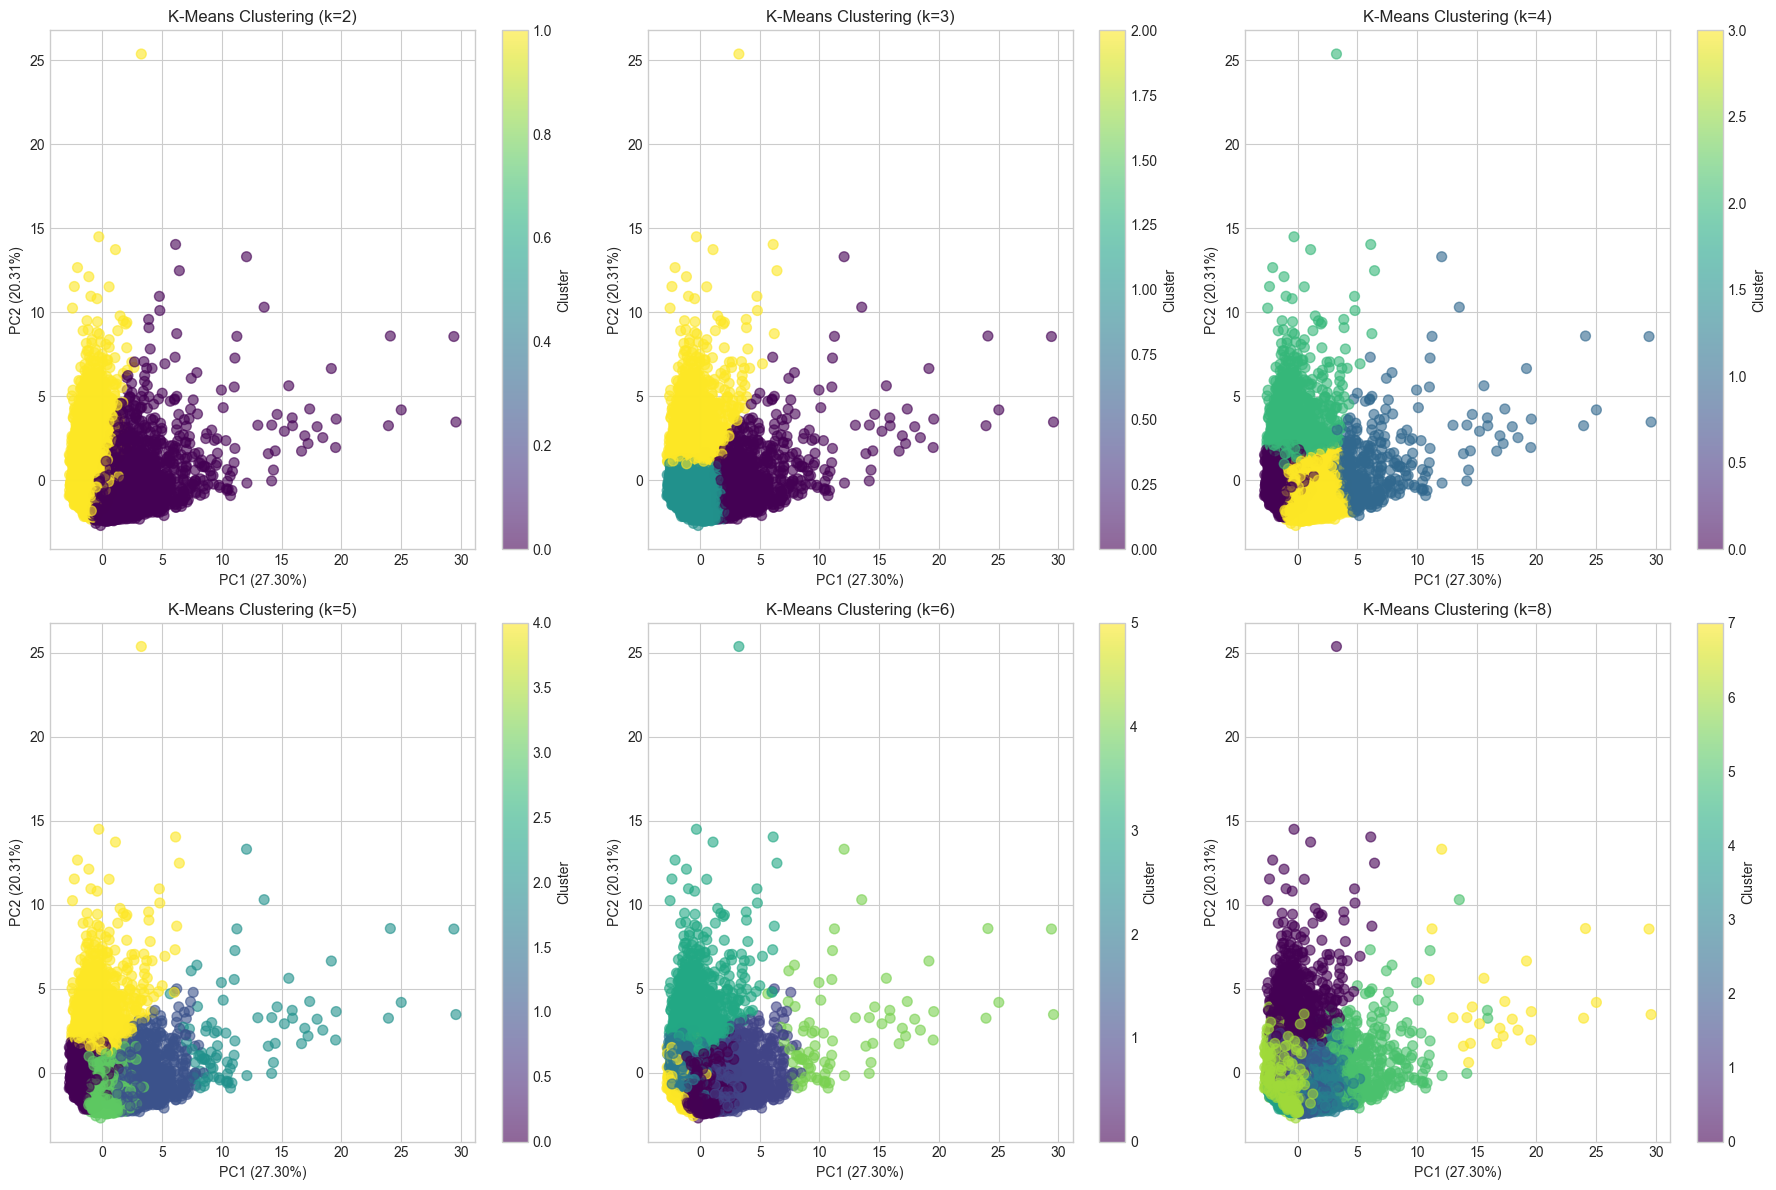


=== K-Means: Effect of n_clusters on Performance ===
        Model  Silhouette  Calinski-Harabasz  Davies-Bouldin
K-Means (k=2)      0.2100          1706.1790          1.9120
K-Means (k=3)      0.2510          1605.0264          1.5920
K-Means (k=4)      0.1977          1598.0769          1.5748
K-Means (k=5)      0.1931          1482.6682          1.5492
K-Means (k=6)      0.2029          1419.6994          1.5064
K-Means (k=8)      0.2217          1331.9734          1.3697


In [42]:
# Experiment with different n_clusters values
n_clusters_values = [2, 3, 4, 5, 6, 8]
kmeans_n_clusters_results = []

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, n_clusters in enumerate(n_clusters_values):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    # Evaluate
    metrics = evaluate_clustering(X_scaled, labels, f"K-Means (k={n_clusters})")
    kmeans_n_clusters_results.append(metrics)
    
    # Visualize
    visualize_clusters(X_scaled, labels, f'K-Means Clustering (k={n_clusters})', ax=axes[idx])

plt.tight_layout()
plt.show()

# Display results table
results_df = pd.DataFrame(kmeans_n_clusters_results)
print("\n=== K-Means: Effect of n_clusters on Performance ===")
print(results_df.to_string(index=False))

### 1.2 Experimenting with Different Initialization Methods (init)

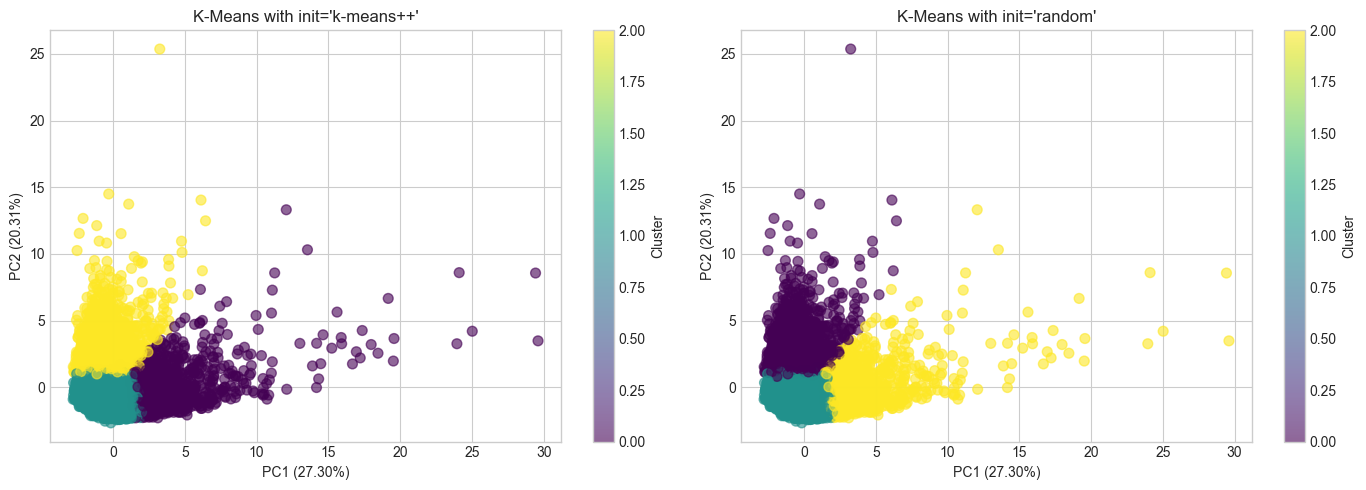


=== K-Means: Effect of Initialization Method on Performance ===
           Model  Silhouette  Calinski-Harabasz  Davies-Bouldin  Inertia  Iterations
init='k-means++'      0.2510          1605.0264          1.5920 111975.0          27
   init='random'      0.2506          1605.0873          1.5967 111973.9          26


In [ ]:
# Experiment with different initialization methods
init_methods = ['k-means++', 'random']
kmeans_init_results = []

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, init_method in enumerate(init_methods):
    kmeans = KMeans(n_clusters=4, init=init_method, n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    # Evaluate
    metrics = evaluate_clustering(X_scaled, labels, f"init='{init_method}'")
    metrics['Inertia'] = round(kmeans.inertia_, 1)
    metrics['Iterations'] = kmeans.n_iter_
    kmeans_init_results.append(metrics)
    
    # Visualize
    visualize_clusters(X_scaled, labels, f"K-Means with init='{init_method}'", ax=axes[idx])

plt.tight_layout()
plt.show()

# Display results
results_df = pd.DataFrame(kmeans_init_results)
print("\n=== K-Means: Effect of Initialization Method on Performance ===")
print(results_df.to_string(index=False))

### 1.3 Experimenting with Different n_init Values

=== K-Means: Effect of n_init on Performance Stability ===
 n_init  Mean Inertia  Std Inertia  Mean Silhouette  Std Silhouette
      1   101512.8699    2000.8150           0.1893          0.0068
      5    99062.0549       0.1642           0.1978          0.0003
     10    99062.0549       0.1642           0.1978          0.0003
     20    99062.0549       0.1642           0.1978          0.0003
     50    99061.9383       0.0012           0.1977          0.0000


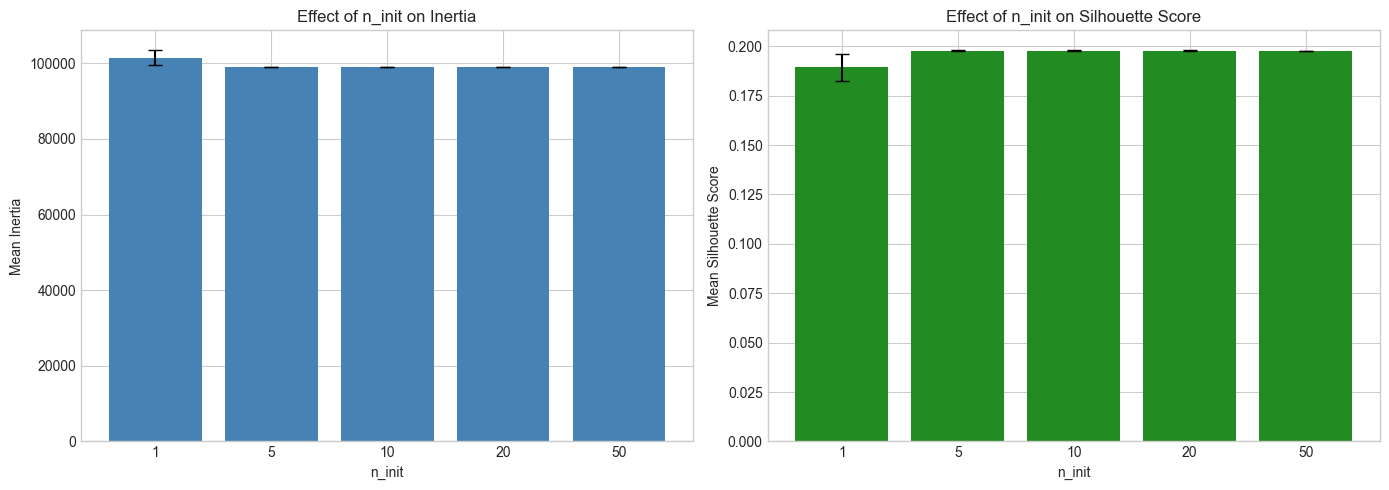


Note: Higher n_init values provide more stable results (lower std) but increase computation time.


In [44]:
# Experiment with different n_init values
n_init_values = [1, 5, 10, 20, 50]
kmeans_n_init_results = []

for n_init in n_init_values:
    inertias = []
    silhouettes = []
    
    for seed in range(5):  
        kmeans = KMeans(n_clusters=4, init='k-means++', n_init=n_init, max_iter=300, random_state=seed)
        labels = kmeans.fit_predict(X_scaled)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X_scaled, labels))
    
    kmeans_n_init_results.append({
        'n_init': n_init,
        'Mean Inertia': round(np.mean(inertias), 4),
        'Std Inertia': round(np.std(inertias), 4),
        'Mean Silhouette': round(np.mean(silhouettes), 4),
        'Std Silhouette': round(np.std(silhouettes), 4)
    })

# Display results
results_df = pd.DataFrame(kmeans_n_init_results)
print("=== K-Means: Effect of n_init on Performance Stability ===")
print(results_df.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Inertia comparison
axes[0].bar(range(len(n_init_values)), [r['Mean Inertia'] for r in kmeans_n_init_results], 
            yerr=[r['Std Inertia'] for r in kmeans_n_init_results], capsize=5, color='steelblue')
axes[0].set_xticks(range(len(n_init_values)))
axes[0].set_xticklabels(n_init_values)
axes[0].set_xlabel('n_init')
axes[0].set_ylabel('Mean Inertia')
axes[0].set_title('Effect of n_init on Inertia')

# Silhouette comparison
axes[1].bar(range(len(n_init_values)), [r['Mean Silhouette'] for r in kmeans_n_init_results],
            yerr=[r['Std Silhouette'] for r in kmeans_n_init_results], capsize=5, color='forestgreen')
axes[1].set_xticks(range(len(n_init_values)))
axes[1].set_xticklabels(n_init_values)
axes[1].set_xlabel('n_init')
axes[1].set_ylabel('Mean Silhouette Score')
axes[1].set_title('Effect of n_init on Silhouette Score')

plt.tight_layout()
plt.show()

print("\nNote: Higher n_init values provide more stable results (lower std) but increase computation time.")

### 1.4 Experimenting with Different max_iter Values

=== K-Means: Effect of max_iter on Performance ===
        Model  Silhouette  Calinski-Harabasz  Davies-Bouldin    Inertia  Actual Iterations  Converged
  max_iter=10      0.1971          1597.8216          1.5777 99068.5033                 10      False
  max_iter=50      0.1977          1598.0769          1.5748 99061.9398                 18       True
 max_iter=100      0.1977          1598.0769          1.5748 99061.9398                 18       True
 max_iter=300      0.1977          1598.0769          1.5748 99061.9398                 18       True
 max_iter=500      0.1977          1598.0769          1.5748 99061.9398                 18       True
max_iter=1000      0.1977          1598.0769          1.5748 99061.9398                 18       True


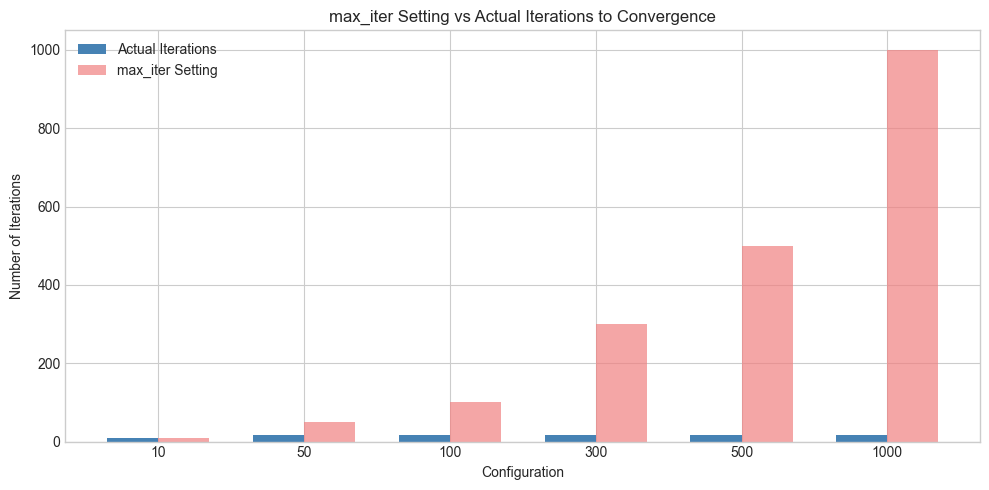

In [45]:
# Experiment with different max_iter values
max_iter_values = [10, 50, 100, 300, 500, 1000]
kmeans_max_iter_results = []

for max_iter in max_iter_values:
    kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=max_iter, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    metrics = evaluate_clustering(X_scaled, labels, f"max_iter={max_iter}")
    metrics['Inertia'] = round(kmeans.inertia_, 4)
    metrics['Actual Iterations'] = kmeans.n_iter_
    metrics['Converged'] = kmeans.n_iter_ < max_iter
    kmeans_max_iter_results.append(metrics)

# Display results
results_df = pd.DataFrame(kmeans_max_iter_results)
print("=== K-Means: Effect of max_iter on Performance ===")
print(results_df.to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(10, 5))
x = range(len(max_iter_values))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], [r['Actual Iterations'] for r in kmeans_max_iter_results], 
               width, label='Actual Iterations', color='steelblue')
bars2 = ax.bar([i + width/2 for i in x], max_iter_values, width, label='max_iter Setting', 
               color='lightcoral', alpha=0.7)

ax.set_xlabel('Configuration')
ax.set_ylabel('Number of Iterations')
ax.set_title('max_iter Setting vs Actual Iterations to Convergence')
ax.set_xticks(x)
ax.set_xticklabels(max_iter_values)
ax.legend()

plt.tight_layout()
plt.show()



### 1.5 K-Means Summary and Best Configuration

=== K-Means Final Model with Optimal Parameters ===

Final K-Means Performance:
  Model: Best K-Means
  Silhouette: 0.1977
  Calinski-Harabasz: 1598.0769
  Davies-Bouldin: 1.5748

Cluster Distribution:
  Cluster 0: 3977 samples (44.4%)
  Cluster 1: 409 samples (4.6%)
  Cluster 2: 1197 samples (13.4%)
  Cluster 3: 3367 samples (37.6%)
Final K-Means Performance:
  Model: Best K-Means
  Silhouette: 0.1977
  Calinski-Harabasz: 1598.0769
  Davies-Bouldin: 1.5748

Cluster Distribution:
  Cluster 0: 3977 samples (44.4%)
  Cluster 1: 409 samples (4.6%)
  Cluster 2: 1197 samples (13.4%)
  Cluster 3: 3367 samples (37.6%)


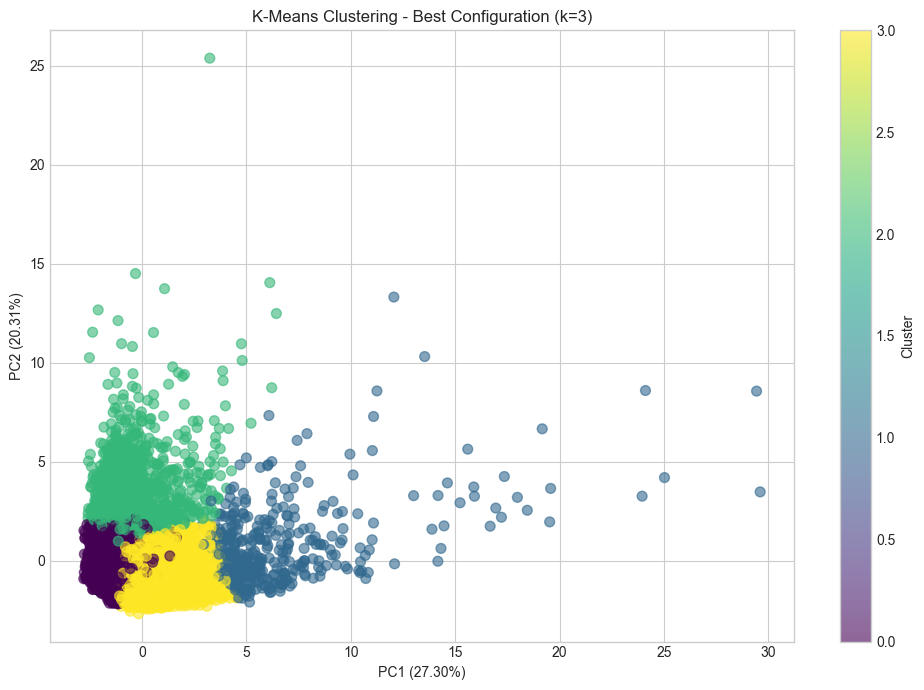

In [46]:
# Final K-Means with Best Configuration
print("=== K-Means Final Model with Optimal Parameters ===\n")

# Using the best configuration based on our experiments
best_kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, max_iter=300, random_state=42)
kmeans_labels = best_kmeans.fit_predict(X_scaled)

# Final evaluation
final_metrics = evaluate_clustering(X_scaled, kmeans_labels, "Best K-Means")
print("Final K-Means Performance:")
for key, value in final_metrics.items():
    print(f"  {key}: {value}")

# Cluster distribution
print(f"\nCluster Distribution:")
unique, counts = np.unique(kmeans_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples ({count/len(kmeans_labels)*100:.1f}%)")

# Final visualization
fig, ax = plt.subplots(figsize=(10, 7))
visualize_clusters(X_scaled, kmeans_labels, 'K-Means Clustering - Best Configuration (k=3)', ax=ax)
plt.tight_layout()
plt.show()

---
# Part 2: K-Medoids Clustering

K-Medoids (PAM - Partitioning Around Medoids) is similar to K-Means but uses actual data points as cluster centers (medoids) instead of centroids. This makes it more robust to outliers.

**Parameters to experiment with:**
- `n_clusters`: Number of clusters
- `metric`: Distance metric ('euclidean', 'manhattan', 'cosine')
- `init`: Initialization method ('k-medoids++', 'random', 'heuristic')

### 2.1 Experimenting with Different n_clusters Values

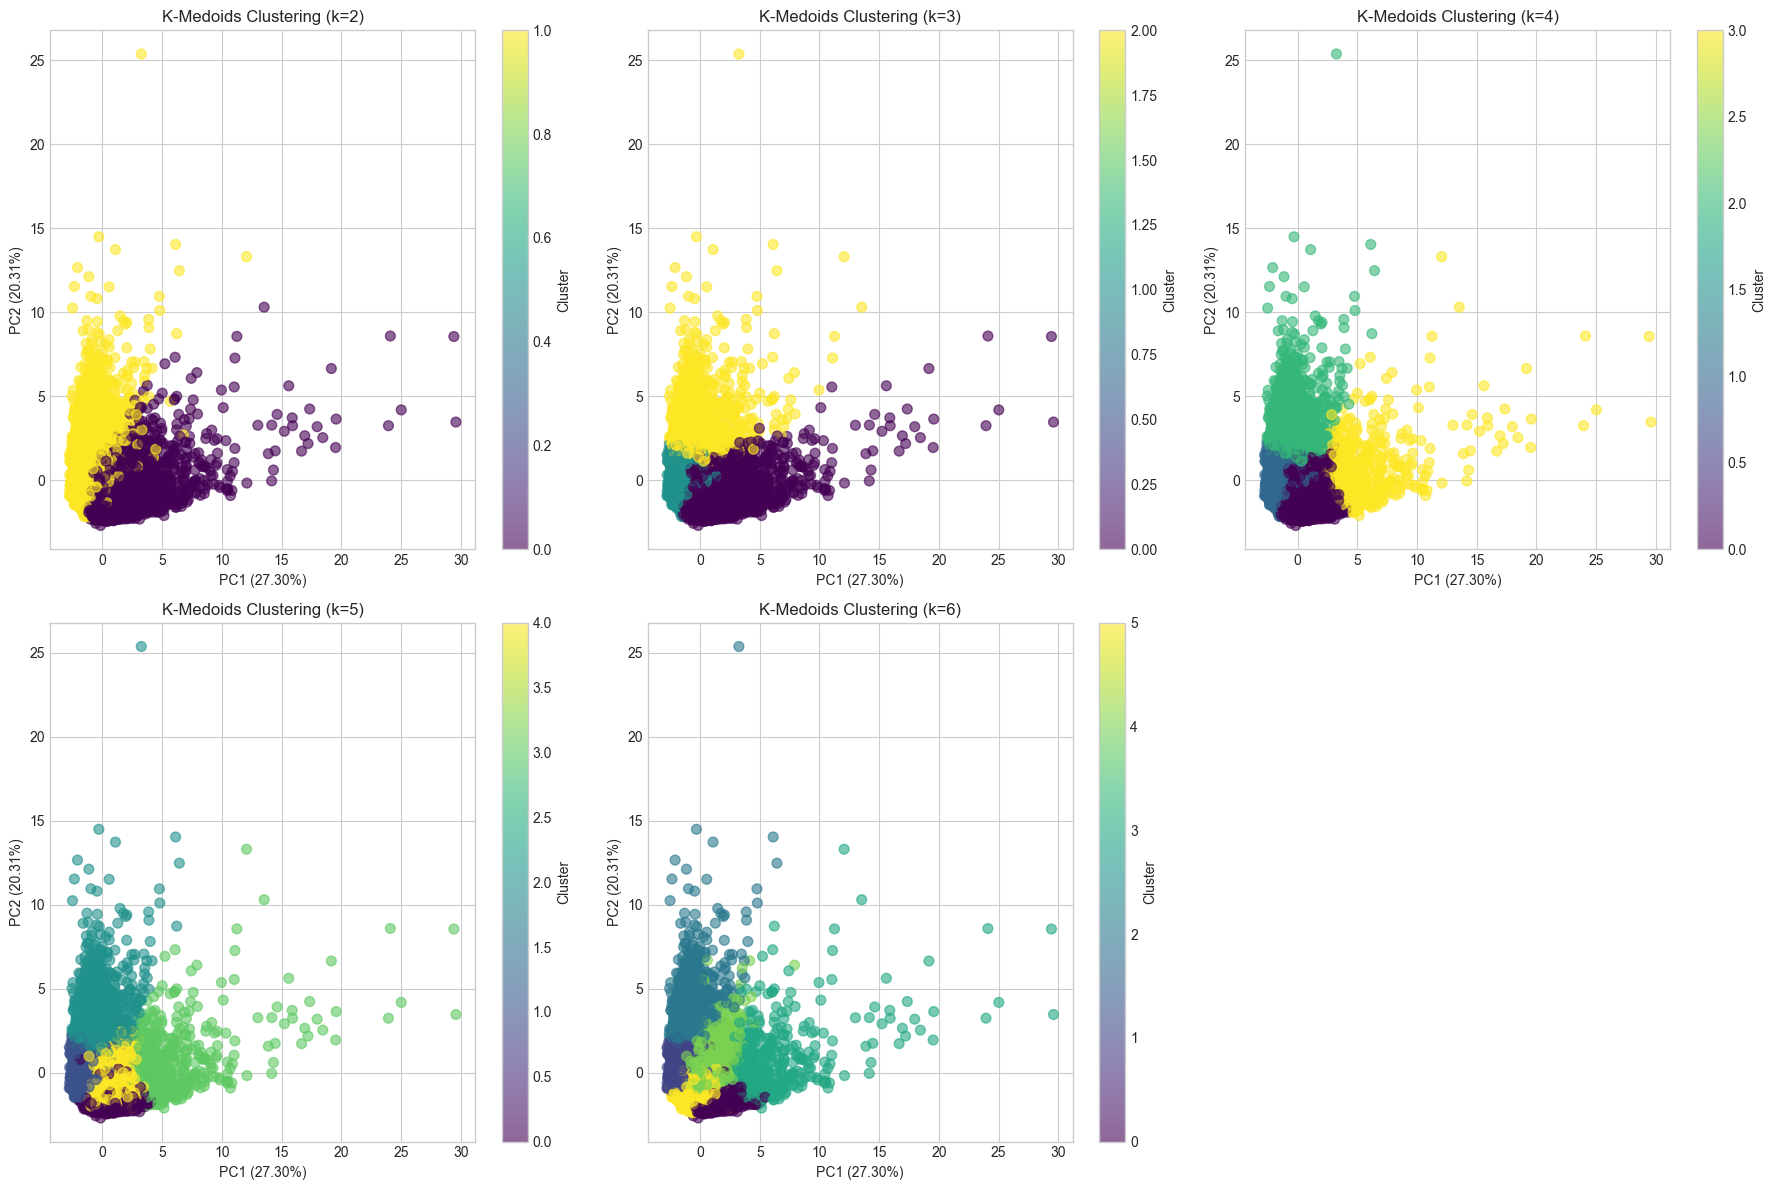


=== K-Medoids: Effect of n_clusters on Performance ===
          Model  Silhouette  Calinski-Harabasz  Davies-Bouldin
K-Medoids (k=2)      0.2035          1650.2516          1.9323
K-Medoids (k=3)      0.1722          1468.2275          1.6684
K-Medoids (k=4)      0.1795          1549.5519          1.6232
K-Medoids (k=5)      0.1611          1323.2686          1.7878
K-Medoids (k=6)      0.1264          1112.7052          1.8753


In [47]:
# Experiment with different n_clusters values for K-Medoids
n_clusters_values = [2, 3, 4, 5, 6]
kmedoids_n_clusters_results = []

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, n_clusters in enumerate(n_clusters_values):
    kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', init='k-medoids++', random_state=42)
    labels = kmedoids.fit_predict(X_scaled)
    
    # Evaluate
    metrics = evaluate_clustering(X_scaled, labels, f"K-Medoids (k={n_clusters})")
    kmedoids_n_clusters_results.append(metrics)
    
    # Visualize
    visualize_clusters(X_scaled, labels, f'K-Medoids Clustering (k={n_clusters})', ax=axes[idx])

# Hide the last empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

# Display results table
results_df = pd.DataFrame(kmedoids_n_clusters_results)
print("\n=== K-Medoids: Effect of n_clusters on Performance ===")
print(results_df.to_string(index=False))

### 2.2 Experimenting with Different Distance Metrics

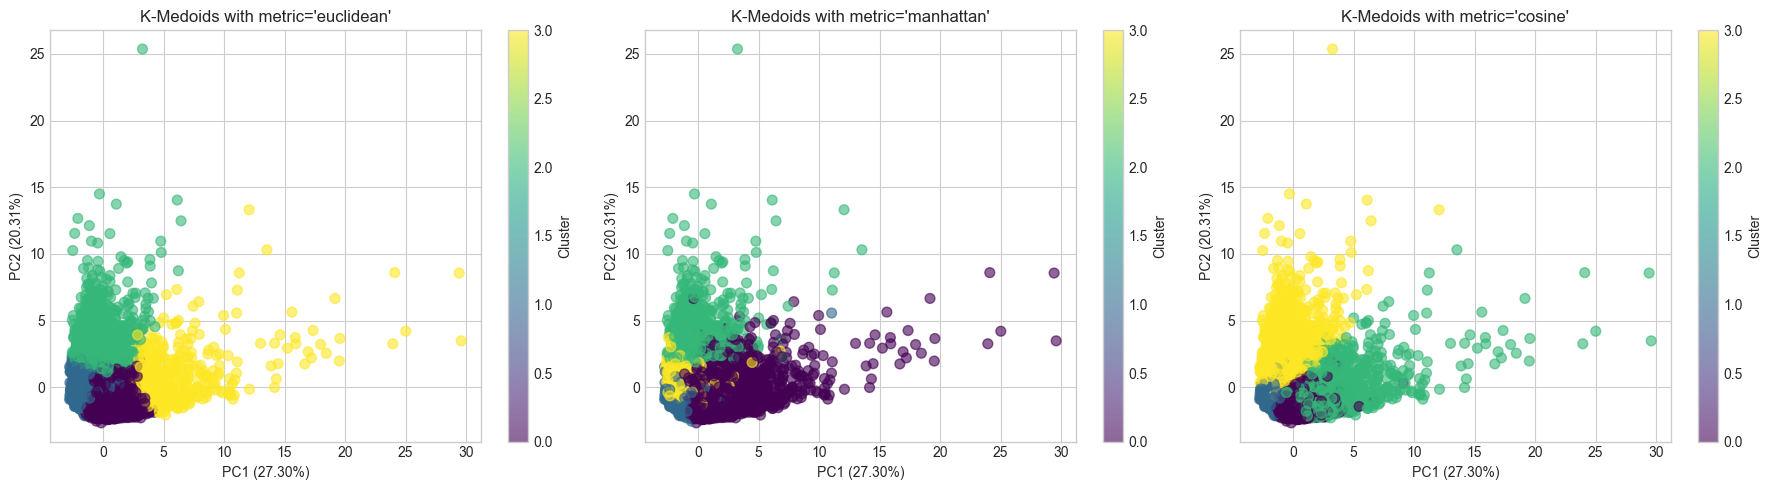


=== K-Medoids: Effect of Distance Metric on Performance ===
             Model  Silhouette  Calinski-Harabasz  Davies-Bouldin    Inertia
metric='euclidean'      0.1795          1549.5519          1.6232 25831.7136
metric='manhattan'      0.1421          1232.1437          1.6054 61969.2198
   metric='cosine'      0.1589          1380.2402          1.7361  3286.5271

Note:
  - Euclidean: Standard straight-line distance
  - Manhattan: Sum of absolute differences (L1 norm)
  - Cosine: Based on angle between vectors (good for high-dimensional data)


In [48]:
# Experiment with different distance metrics
metrics_list = ['euclidean', 'manhattan', 'cosine']
kmedoids_metric_results = []

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, metric in enumerate(metrics_list):
    kmedoids = KMedoids(n_clusters=4, metric=metric, init='k-medoids++', random_state=42)
    labels = kmedoids.fit_predict(X_scaled)
    
    # Evaluate
    eval_metrics = evaluate_clustering(X_scaled, labels, f"metric='{metric}'")
    eval_metrics['Inertia'] = round(kmedoids.inertia_, 4)
    kmedoids_metric_results.append(eval_metrics)
    
    # Visualize
    visualize_clusters(X_scaled, labels, f"K-Medoids with metric='{metric}'", ax=axes[idx])

plt.tight_layout()
plt.show()

# Display results
results_df = pd.DataFrame(kmedoids_metric_results)
print("\n=== K-Medoids: Effect of Distance Metric on Performance ===")
print(results_df.to_string(index=False))
print("\nNote:")
print("  - Euclidean: Standard straight-line distance")
print("  - Manhattan: Sum of absolute differences (L1 norm)")
print("  - Cosine: Based on angle between vectors (good for high-dimensional data)")

### 2.3 Experimenting with Different Initialization Methods

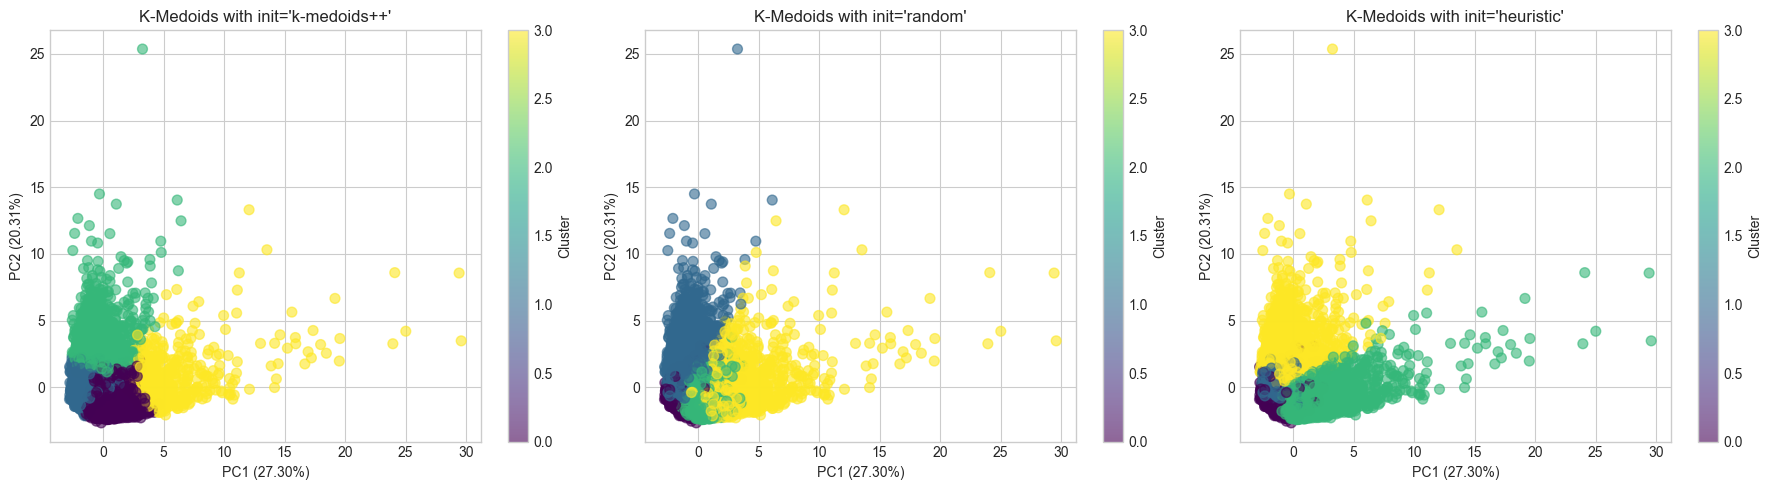


=== K-Medoids: Effect of Initialization Method on Performance ===
             Model  Silhouette  Calinski-Harabasz  Davies-Bouldin    Inertia
init='k-medoids++'      0.1795          1549.5519          1.6232 25831.7136
     init='random'      0.1682          1246.2618          1.6984 25359.4371
  init='heuristic'      0.1374          1253.9694          1.5809 25312.6804

Note:
  - k-medoids++: Similar to k-means++, spreads initial medoids
  - random: Random selection of initial medoids
  - heuristic: Builds initial medoids based on the sorted pairwise distances


In [49]:
# Experiment with different initialization methods
init_methods = ['k-medoids++', 'random', 'heuristic']
kmedoids_init_results = []

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, init_method in enumerate(init_methods):
    kmedoids = KMedoids(n_clusters=4, metric='euclidean', init=init_method, random_state=42)
    labels = kmedoids.fit_predict(X_scaled)
    
    # Evaluate
    metrics = evaluate_clustering(X_scaled, labels, f"init='{init_method}'")
    metrics['Inertia'] = round(kmedoids.inertia_, 4)
    kmedoids_init_results.append(metrics)
    
    # Visualize
    visualize_clusters(X_scaled, labels, f"K-Medoids with init='{init_method}'", ax=axes[idx])

plt.tight_layout()
plt.show()

# Display results
results_df = pd.DataFrame(kmedoids_init_results)
print("\n=== K-Medoids: Effect of Initialization Method on Performance ===")
print(results_df.to_string(index=False))
print("\nNote:")
print("  - k-medoids++: Similar to k-means++, spreads initial medoids")
print("  - random: Random selection of initial medoids")
print("  - heuristic: Builds initial medoids based on the sorted pairwise distances")

### 2.4 K-Means vs K-Medoids Comparison

=== K-Means vs K-Medoids Comparison (k=4) ===
    Model  Silhouette  Calinski-Harabasz  Davies-Bouldin
  K-Means      0.1977          1598.0769          1.5748
K-Medoids      0.1795          1549.5519          1.6232


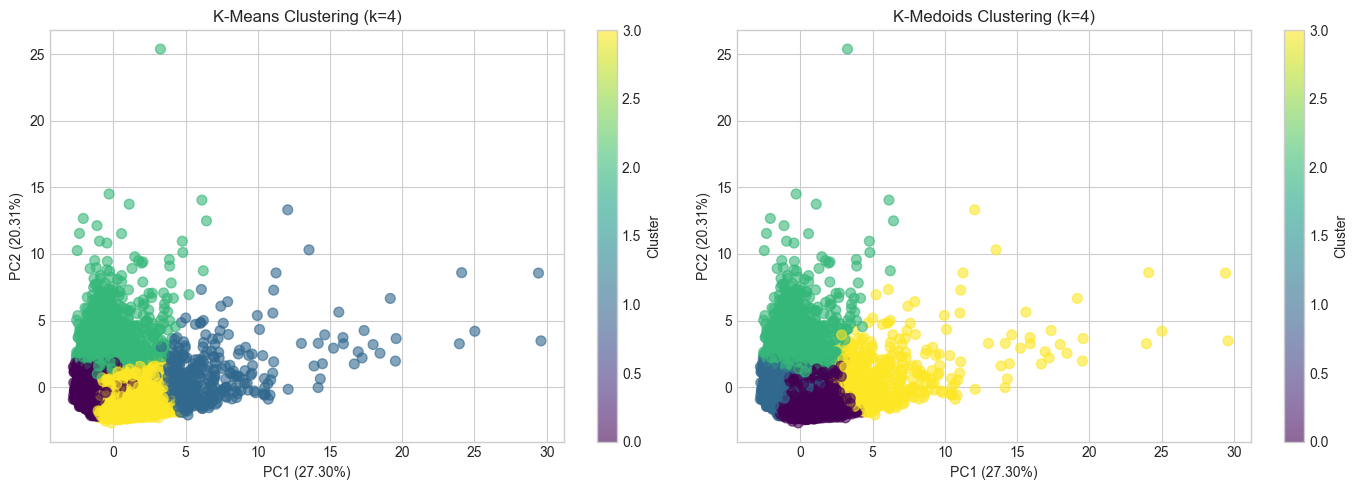

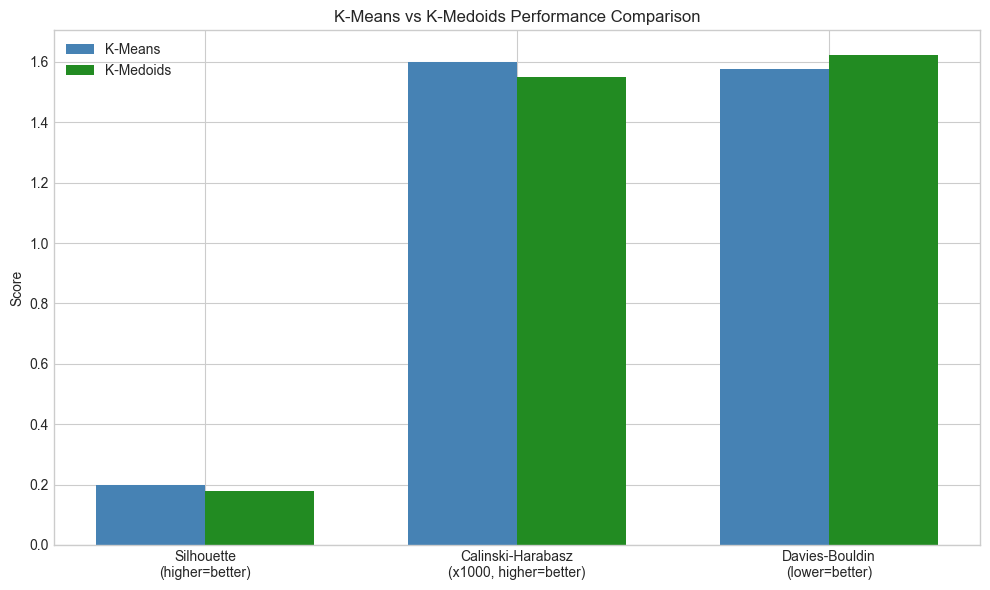


Key Differences:
  - K-Means uses centroids (may not be actual data points)
  - K-Medoids uses medoids (actual data points)
  - K-Medoids is more robust to outliers but computationally more expensive


In [50]:
# Compare K-Means vs K-Medoids with same parameters
comparison_results = []

# K-Means
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_metrics = evaluate_clustering(X_scaled, kmeans_labels, "K-Means")
comparison_results.append(kmeans_metrics)

# K-Medoids
kmedoids = KMedoids(n_clusters=4, metric='euclidean', init='k-medoids++', random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)
kmedoids_metrics = evaluate_clustering(X_scaled, kmedoids_labels, "K-Medoids")
comparison_results.append(kmedoids_metrics)

# Display comparison
comparison_df = pd.DataFrame(comparison_results)
print("=== K-Means vs K-Medoids Comparison (k=4) ===")
print(comparison_df.to_string(index=False))

# Visualization comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

visualize_clusters(X_scaled, kmeans_labels, 'K-Means Clustering (k=4)', ax=axes[0])
visualize_clusters(X_scaled, kmedoids_labels, 'K-Medoids Clustering (k=4)', ax=axes[1])

plt.tight_layout()
plt.show()

# Comparison bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(3)
width = 0.35

metrics_names = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']
kmeans_values = [comparison_results[0]['Silhouette'], 
                 comparison_results[0]['Calinski-Harabasz']/1000,  # Scale for visualization
                 comparison_results[0]['Davies-Bouldin']]
kmedoids_values = [comparison_results[1]['Silhouette'], 
                   comparison_results[1]['Calinski-Harabasz']/1000,  # Scale for visualization
                   comparison_results[1]['Davies-Bouldin']]

bars1 = ax.bar(x - width/2, kmeans_values, width, label='K-Means', color='steelblue')
bars2 = ax.bar(x + width/2, kmedoids_values, width, label='K-Medoids', color='forestgreen')

ax.set_ylabel('Score')
ax.set_title('K-Means vs K-Medoids Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(['Silhouette\n(higher=better)', 'Calinski-Harabasz\n(x1000, higher=better)', 'Davies-Bouldin\n(lower=better)'])
ax.legend()

plt.tight_layout()
plt.show()

print("\nKey Differences:")
print("  - K-Means uses centroids (may not be actual data points)")
print("  - K-Medoids uses medoids (actual data points)")
print("  - K-Medoids is more robust to outliers but computationally more expensive")

---
# Part 3: Hierarchical Clustering

Hierarchical clustering builds a tree of clusters (dendrogram). Agglomerative approach starts with each point as its own cluster and merges them iteratively.

**Parameters to experiment with:**
- `linkage`: How to measure distance between clusters ('ward', 'complete', 'average', 'single')
- `n_clusters`: Number of clusters to extract from the hierarchy
- Distance metrics

### 3.1 Dendrogram Visualization for All Linkage Methods

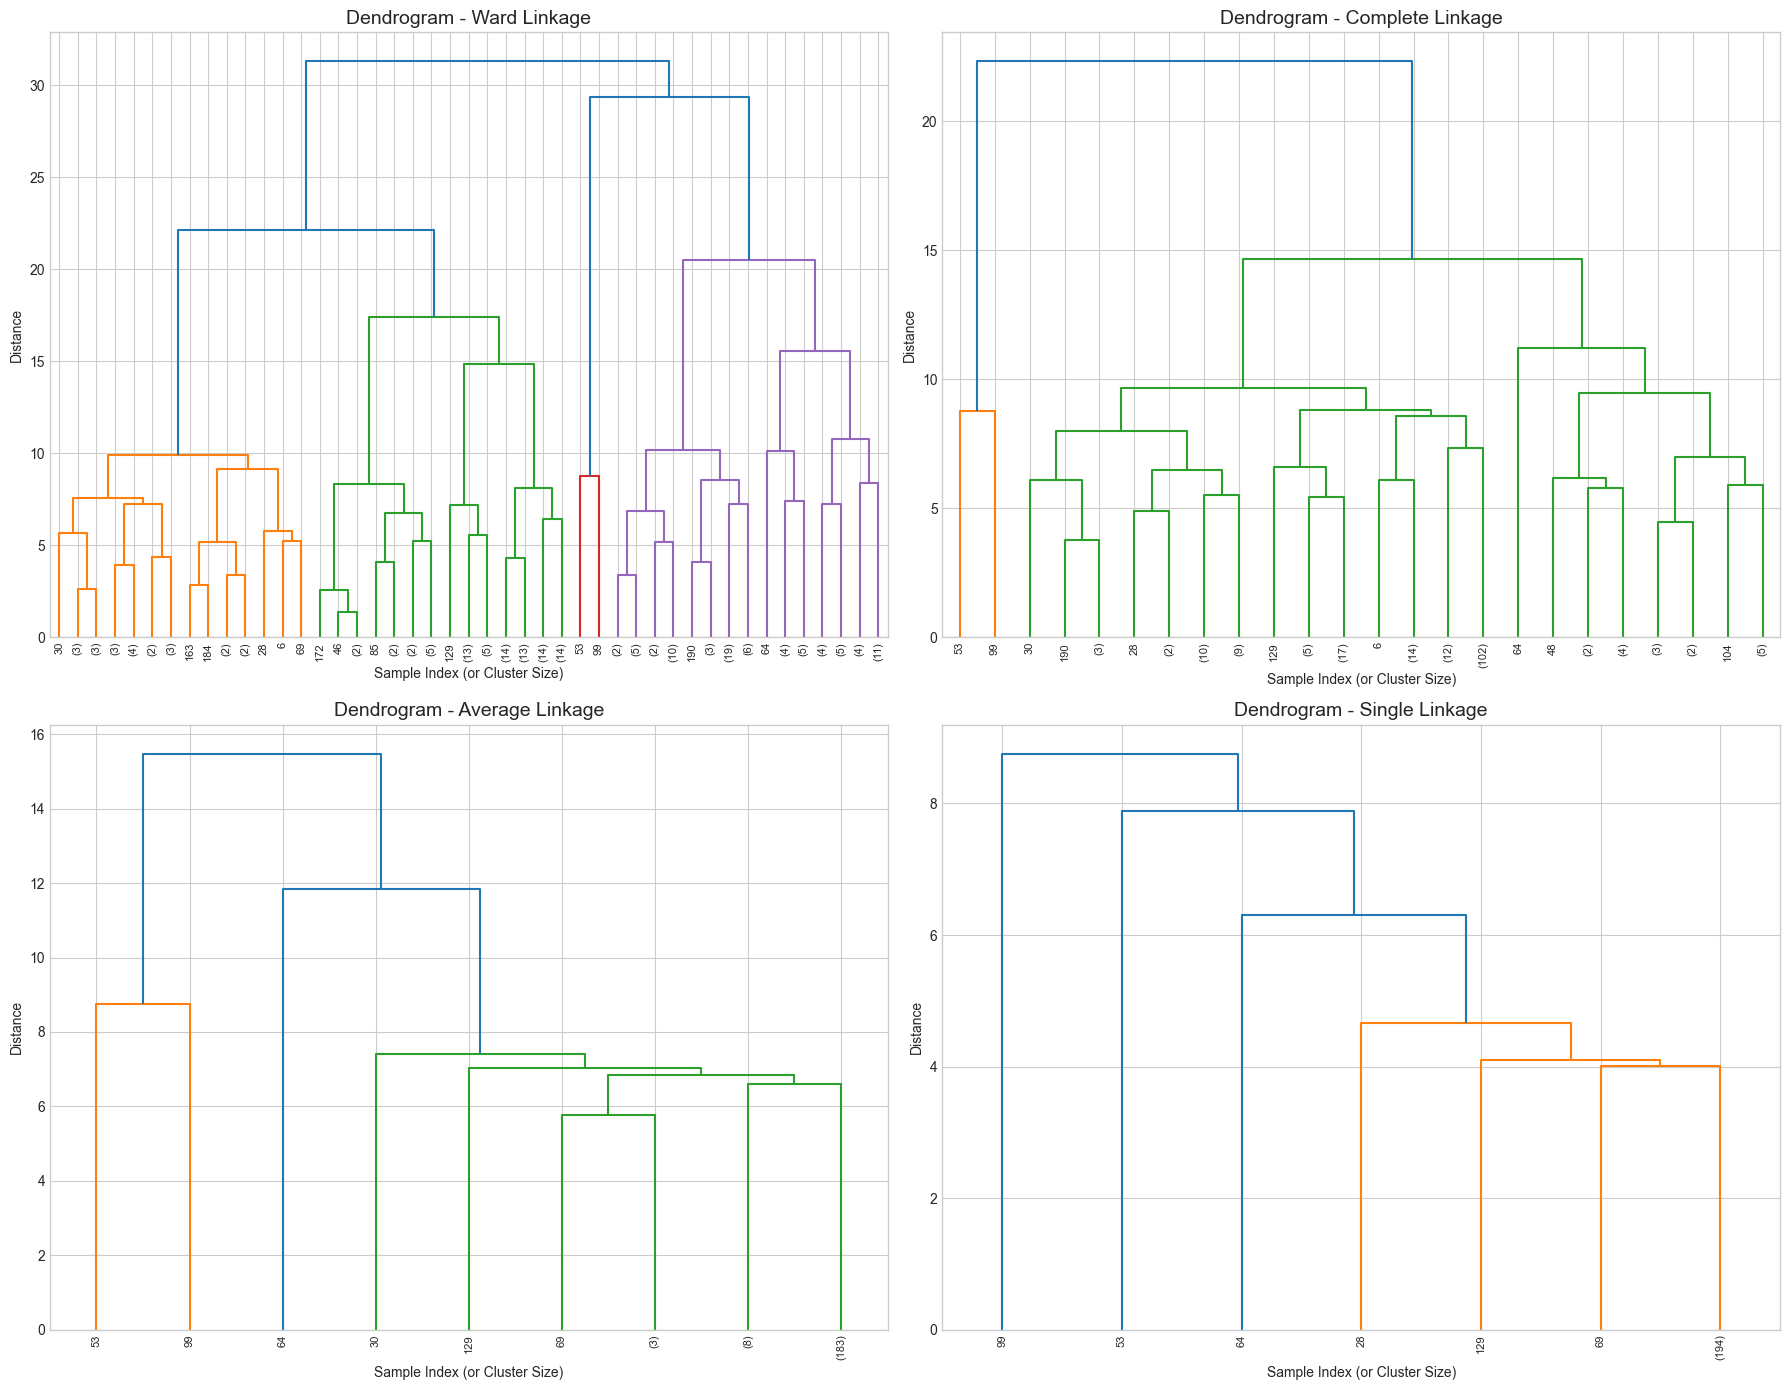

Linkage Methods Explanation:
  - Ward: Minimizes variance within clusters (tends to produce similar-sized clusters)
  - Complete: Uses maximum distance between cluster points (tends to produce compact clusters)
  - Average: Uses average distance between all pairs of points in clusters
  - Single: Uses minimum distance between cluster points (can create 'chaining' effect)


In [51]:
# Create dendrograms for all linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

# Use a sample for better visualization (dendrograms can be complex with many points)
np.random.seed(42)
sample_size = min(200, len(X_scaled))
sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[sample_indices]

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

for idx, method in enumerate(linkage_methods):
    # Compute linkage matrix
    Z = linkage(X_sample, method=method)
    
    # Plot dendrogram
    ax = axes[idx]
    dendrogram(Z, ax=ax, truncate_mode='level', p=5, 
               leaf_rotation=90, leaf_font_size=8,
               color_threshold=0.7*max(Z[:,2]))
    
    ax.set_title(f'Dendrogram - {method.capitalize()} Linkage', fontsize=14)
    ax.set_xlabel('Sample Index (or Cluster Size)')
    ax.set_ylabel('Distance')

plt.tight_layout()
plt.show()

print("Linkage Methods Explanation:")
print("  - Ward: Minimizes variance within clusters (tends to produce similar-sized clusters)")
print("  - Complete: Uses maximum distance between cluster points (tends to produce compact clusters)")
print("  - Average: Uses average distance between all pairs of points in clusters")
print("  - Single: Uses minimum distance between cluster points (can create 'chaining' effect)")

### 3.2 Comparing All Linkage Methods with Cluster Visualization

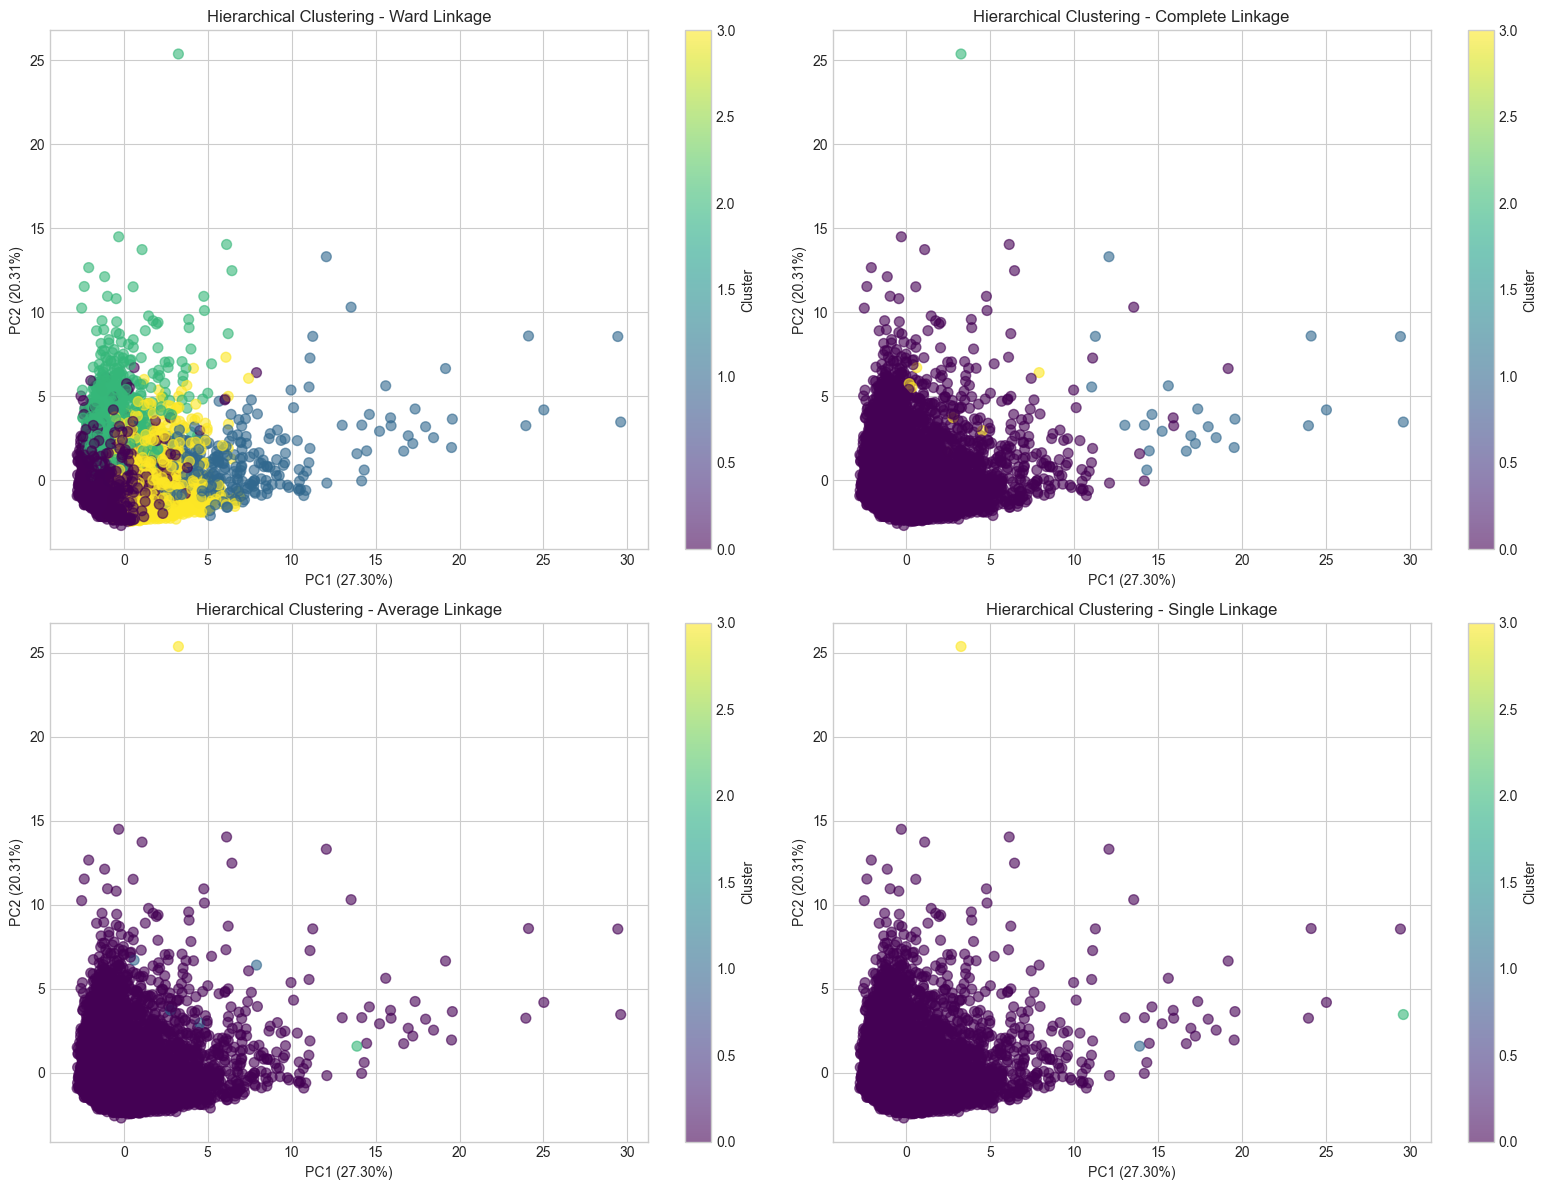


=== Hierarchical Clustering: Effect of Linkage Method on Performance ===
             Model  Silhouette  Calinski-Harabasz  Davies-Bouldin
    linkage='ward'      0.1598          1223.6092          1.7503
linkage='complete'      0.7792           339.8114          0.4927
 linkage='average'      0.8080            90.7405          0.2649
  linkage='single'      0.8121            58.4525          0.1181


In [52]:
# Compare all linkage methods with clustering visualization
linkage_methods = ['ward', 'complete', 'average', 'single']
hierarchical_results = []

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, linkage_method in enumerate(linkage_methods):
    # Apply Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=4, linkage=linkage_method)
    labels = agg_clustering.fit_predict(X_scaled)
    
    # Evaluate
    metrics = evaluate_clustering(X_scaled, labels, f"linkage='{linkage_method}'")
    hierarchical_results.append(metrics)
    
    # Visualize
    visualize_clusters(X_scaled, labels, f"Hierarchical Clustering - {linkage_method.capitalize()} Linkage", ax=axes[idx])

plt.tight_layout()
plt.show()

# Display results
results_df = pd.DataFrame(hierarchical_results)
print("\n=== Hierarchical Clustering: Effect of Linkage Method on Performance ===")
print(results_df.to_string(index=False))

### 3.3 Effect of Number of Clusters on Hierarchical Clustering

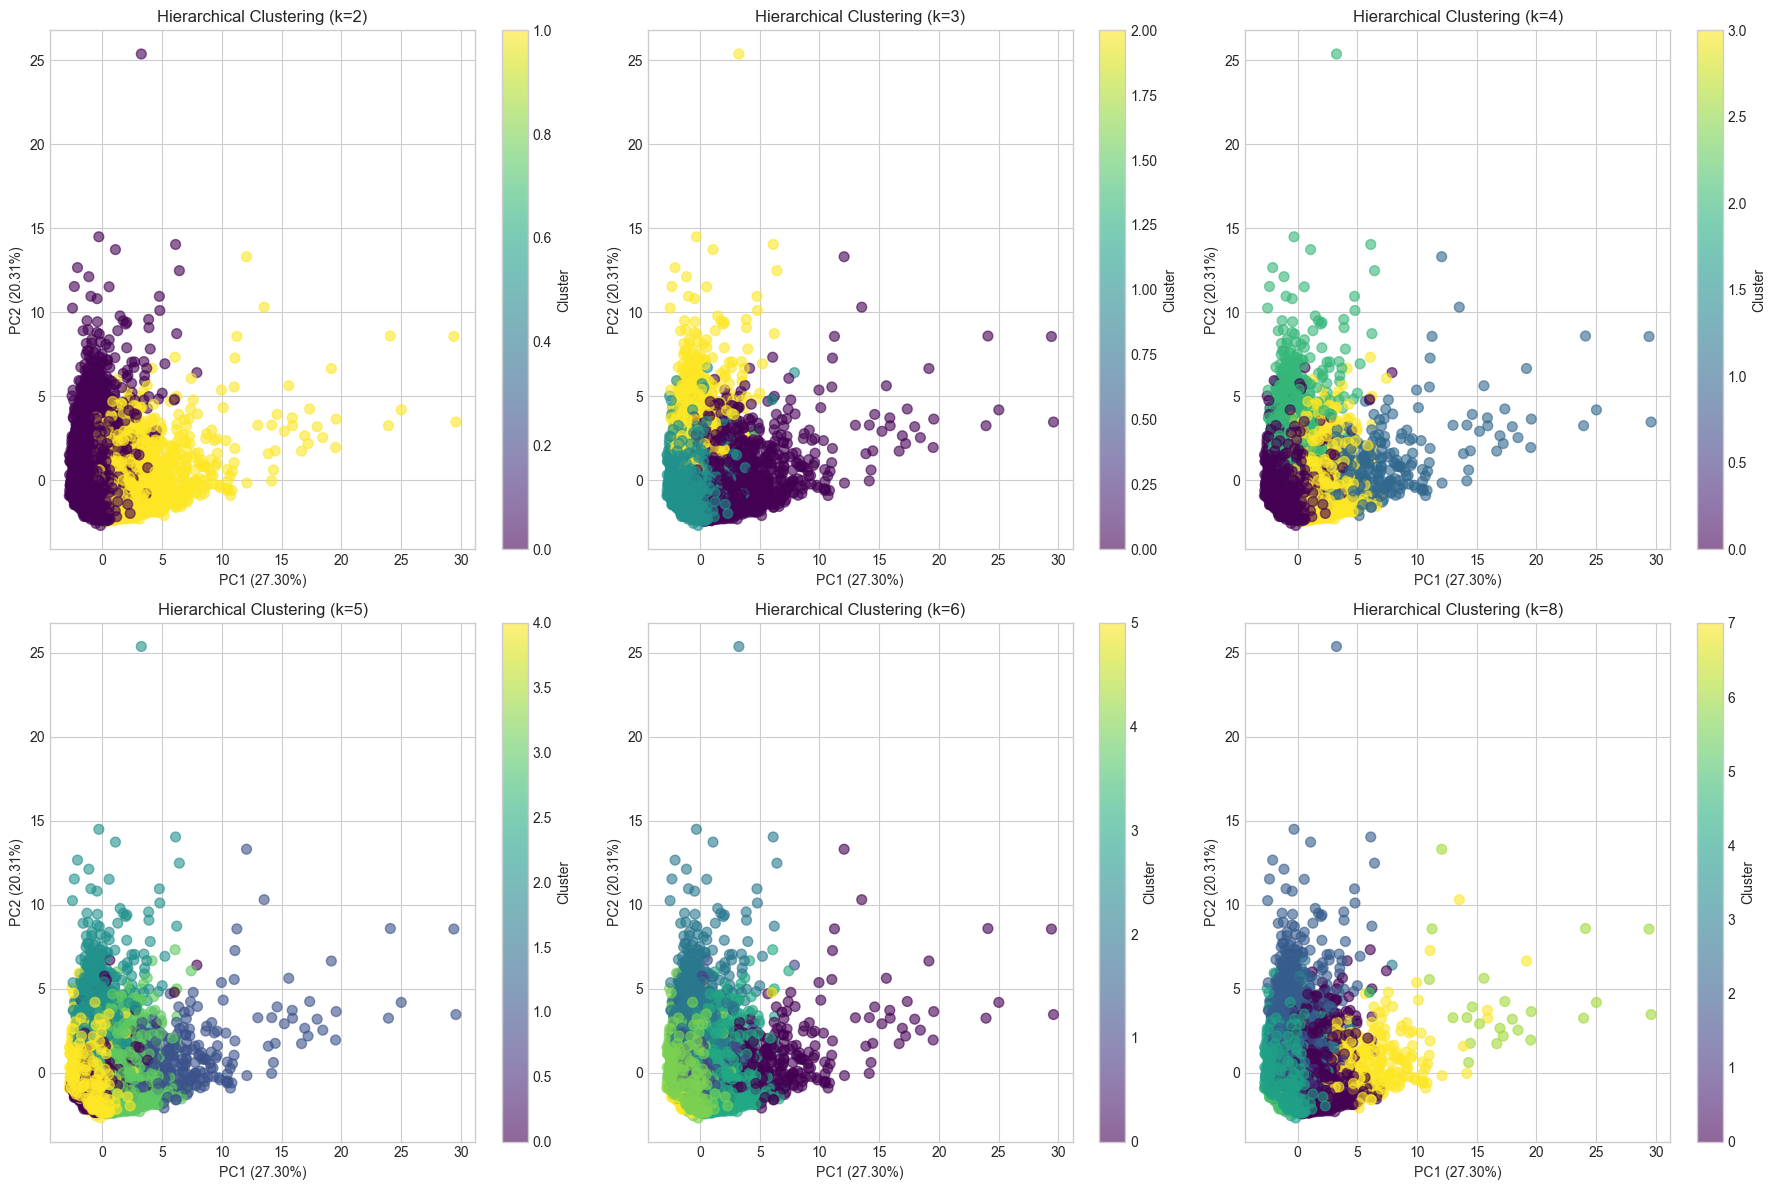


=== Hierarchical Clustering: Effect of n_clusters (Ward Linkage) ===
             Model  Silhouette  Calinski-Harabasz  Davies-Bouldin
Hierarchical (k=2)      0.1921          1393.5306          2.0300
Hierarchical (k=3)      0.1674          1239.3256          1.8496
Hierarchical (k=4)      0.1598          1223.6092          1.7503
Hierarchical (k=5)      0.1763          1140.5648          1.6479
Hierarchical (k=6)      0.1593          1086.4558          1.5584
Hierarchical (k=8)      0.1609          1033.9586          1.3882


In [53]:
# Effect of n_clusters on hierarchical clustering (using Ward linkage)
n_clusters_values = [2, 3, 4, 5, 6, 8]
hierarchical_n_clusters_results = []

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, n_clusters in enumerate(n_clusters_values):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg_clustering.fit_predict(X_scaled)
    
    # Evaluate
    metrics = evaluate_clustering(X_scaled, labels, f"Hierarchical (k={n_clusters})")
    hierarchical_n_clusters_results.append(metrics)
    
    # Visualize
    visualize_clusters(X_scaled, labels, f'Hierarchical Clustering (k={n_clusters})', ax=axes[idx])

plt.tight_layout()
plt.show()

# Display results
results_df = pd.DataFrame(hierarchical_n_clusters_results)
print("\n=== Hierarchical Clustering: Effect of n_clusters (Ward Linkage) ===")
print(results_df.to_string(index=False))

### 3.4 Detailed Dendrogram Analysis with Cluster Cut

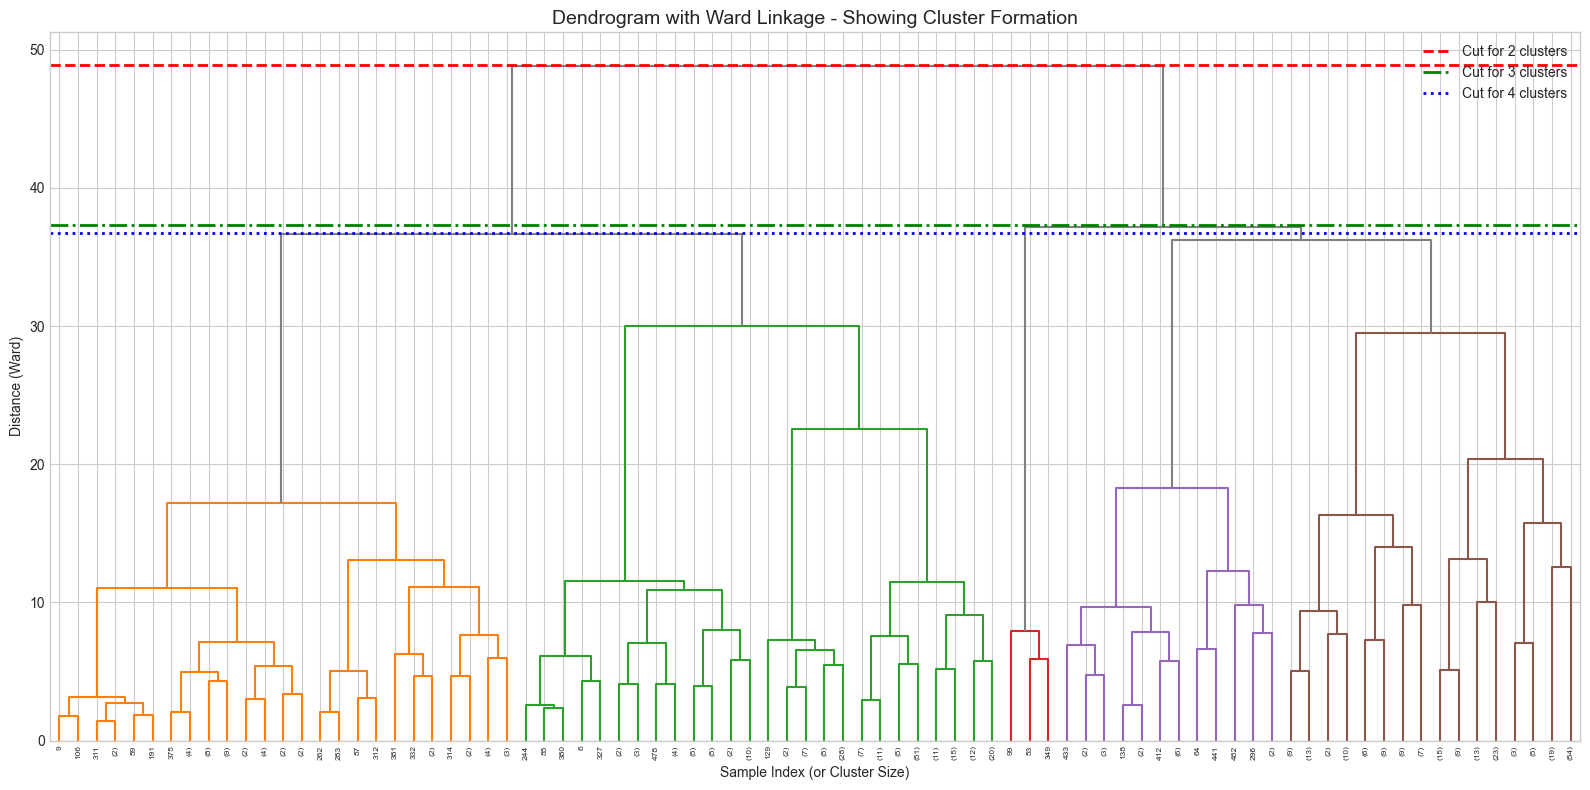

Dendrogram Interpretation:
  - Height represents the distance at which clusters are merged
  - Cutting the dendrogram horizontally at different heights gives different numbers of clusters
  - Large vertical gaps suggest natural cluster separations


In [54]:
# Detailed dendrogram with Ward linkage showing where to cut for different cluster numbers
from scipy.cluster.hierarchy import fcluster

# Use a sample for visualization
np.random.seed(42)
sample_size = min(500, len(X_scaled))
sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[sample_indices]

# Compute linkage
Z = linkage(X_sample, method='ward')

fig, ax = plt.subplots(figsize=(16, 8))

# Plot dendrogram
dend = dendrogram(Z, ax=ax, truncate_mode='level', p=6,
                   leaf_rotation=90, leaf_font_size=6,
                   above_threshold_color='gray')

ax.set_title('Dendrogram with Ward Linkage - Showing Cluster Formation', fontsize=14)
ax.set_xlabel('Sample Index (or Cluster Size)')
ax.set_ylabel('Distance (Ward)')

# Add horizontal lines to show different cluster cuts
max_d = max(Z[:, 2])
for n_clusters, color, linestyle in [(2, 'red', '--'), (3, 'green', '-.'), (4, 'blue', ':')]:
    # Calculate the distance threshold for n_clusters
    threshold = Z[-(n_clusters-1), 2] + 0.1 if n_clusters <= len(Z) else max_d
    ax.axhline(y=threshold, c=color, linestyle=linestyle, linewidth=2, 
               label=f'Cut for {n_clusters} clusters')

ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

print("Dendrogram Interpretation:")
print("  - Height represents the distance at which clusters are merged")
print("  - Cutting the dendrogram horizontally at different heights gives different numbers of clusters")
print("  - Large vertical gaps suggest natural cluster separations")

---
# Part 4: Final Comparison of All Clustering Methods

In [55]:
# Final comparison of all clustering methods with optimal settings
final_comparison = []

# K-Means (Best configuration)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, max_iter=300, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
final_comparison.append(evaluate_clustering(X_scaled, kmeans_labels, "K-Means"))

# K-Medoids (Best configuration)
kmedoids = KMedoids(n_clusters=4, metric='euclidean', init='k-medoids++', random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)
final_comparison.append(evaluate_clustering(X_scaled, kmedoids_labels, "K-Medoids"))

# Hierarchical - Ward
hierarchical_ward = AgglomerativeClustering(n_clusters=4, linkage='ward')
ward_labels = hierarchical_ward.fit_predict(X_scaled)
final_comparison.append(evaluate_clustering(X_scaled, ward_labels, "Hierarchical (Ward)"))

# Hierarchical - Complete
hierarchical_complete = AgglomerativeClustering(n_clusters=4, linkage='complete')
complete_labels = hierarchical_complete.fit_predict(X_scaled)
final_comparison.append(evaluate_clustering(X_scaled, complete_labels, "Hierarchical (Complete)"))

# Hierarchical - Average
hierarchical_average = AgglomerativeClustering(n_clusters=4, linkage='average')
average_labels = hierarchical_average.fit_predict(X_scaled)
final_comparison.append(evaluate_clustering(X_scaled, average_labels, "Hierarchical (Average)"))

# Hierarchical - Single
hierarchical_single = AgglomerativeClustering(n_clusters=4, linkage='single')
single_labels = hierarchical_single.fit_predict(X_scaled)
final_comparison.append(evaluate_clustering(X_scaled, single_labels, "Hierarchical (Single)"))

# Display final comparison
final_df = pd.DataFrame(final_comparison)
print("=" * 70)
print("FINAL COMPARISON OF ALL CLUSTERING METHODS (k=4)")
print("=" * 70)
print(final_df.to_string(index=False))
print("=" * 70)

# Find the best method for each metric
print("\nBest Performance by Metric:")
print(f"  - Highest Silhouette Score: {final_df.loc[final_df['Silhouette'].idxmax(), 'Model']} ({final_df['Silhouette'].max():.4f})")
print(f"  - Highest Calinski-Harabasz: {final_df.loc[final_df['Calinski-Harabasz'].idxmax(), 'Model']} ({final_df['Calinski-Harabasz'].max():.4f})")
print(f"  - Lowest Davies-Bouldin: {final_df.loc[final_df['Davies-Bouldin'].idxmin(), 'Model']} ({final_df['Davies-Bouldin'].min():.4f})")

FINAL COMPARISON OF ALL CLUSTERING METHODS (k=4)
                  Model  Silhouette  Calinski-Harabasz  Davies-Bouldin
                K-Means      0.1977          1598.0769          1.5748
              K-Medoids      0.1795          1549.5519          1.6232
    Hierarchical (Ward)      0.1598          1223.6092          1.7503
Hierarchical (Complete)      0.7792           339.8114          0.4927
 Hierarchical (Average)      0.8080            90.7405          0.2649
  Hierarchical (Single)      0.8121            58.4525          0.1181

Best Performance by Metric:
  - Highest Silhouette Score: Hierarchical (Single) (0.8121)
  - Highest Calinski-Harabasz: K-Means (1598.0769)
  - Lowest Davies-Bouldin: Hierarchical (Single) (0.1181)


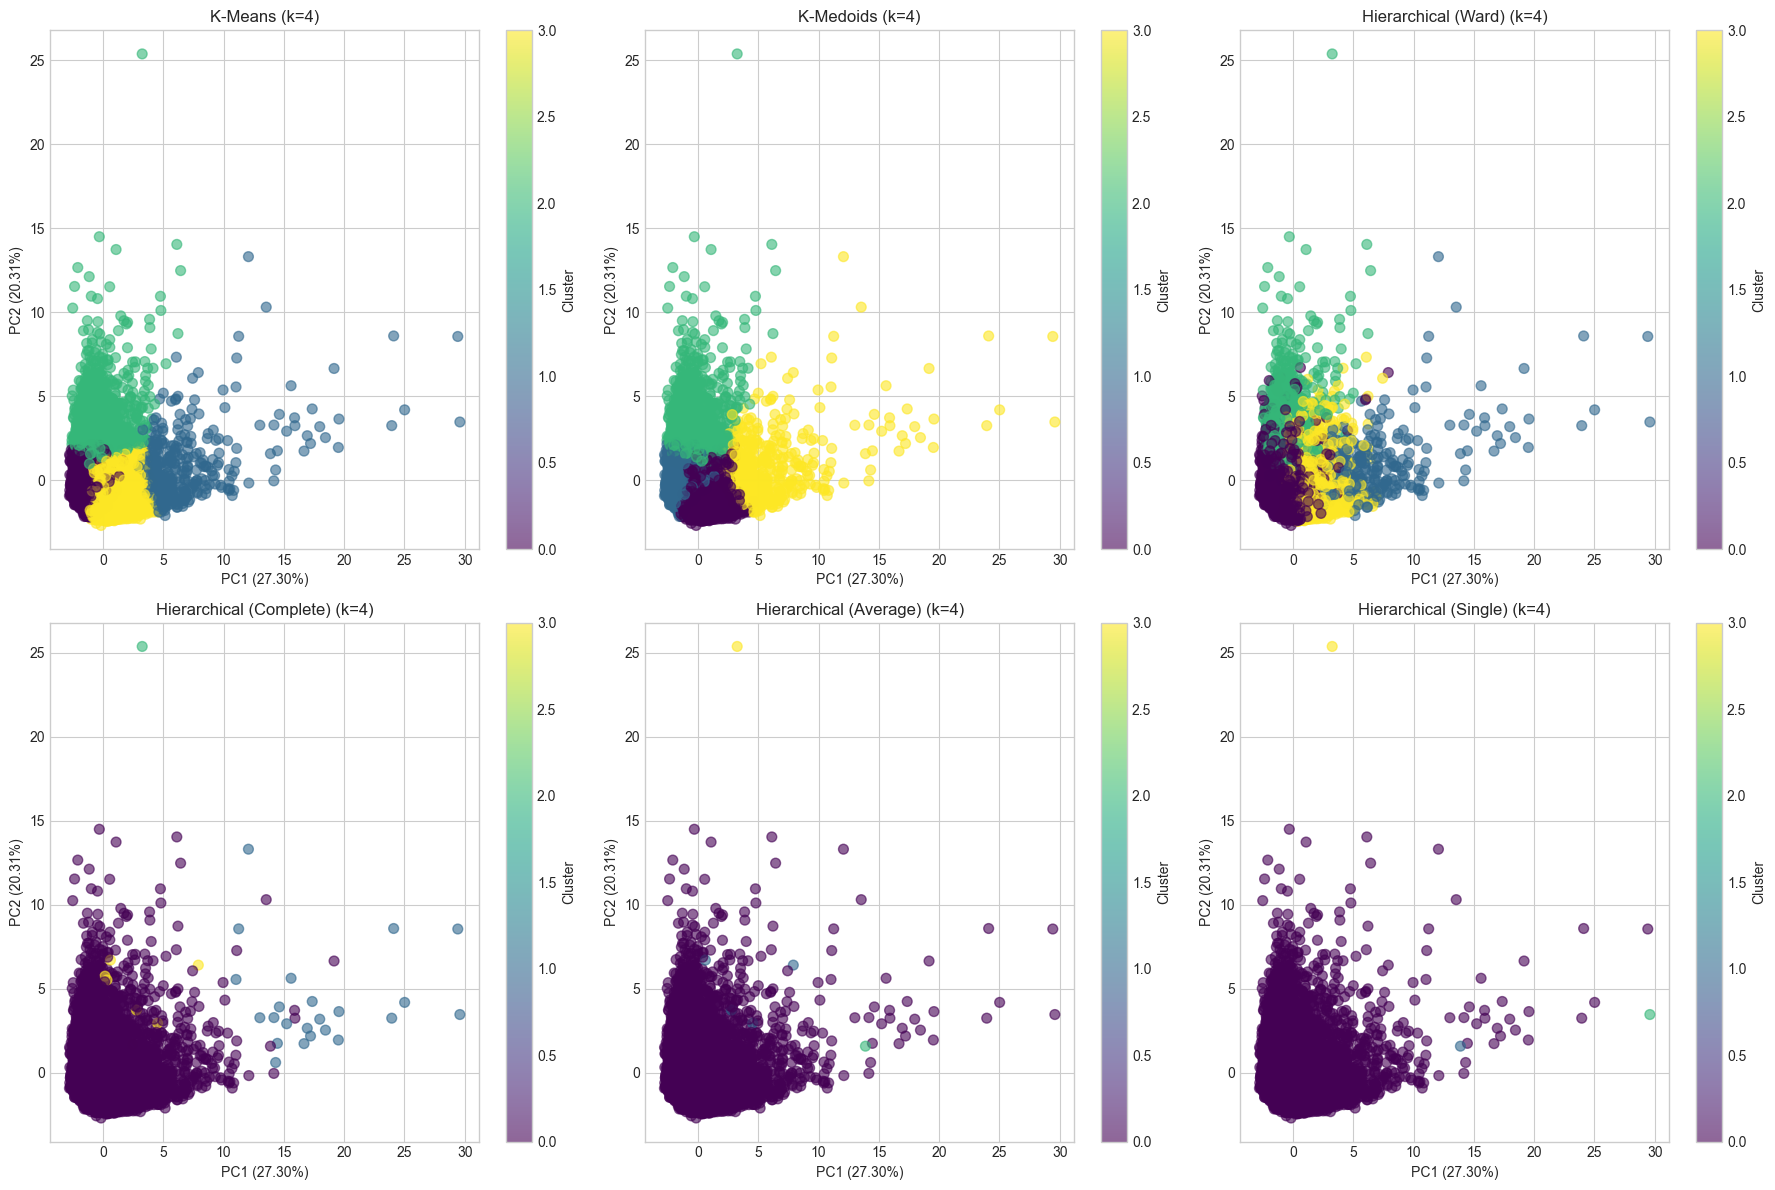

In [56]:
# Visualization of all methods
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

all_labels = [kmeans_labels, kmedoids_labels, ward_labels, complete_labels, average_labels, single_labels]
all_titles = ['K-Means', 'K-Medoids', 'Hierarchical (Ward)', 'Hierarchical (Complete)', 
              'Hierarchical (Average)', 'Hierarchical (Single)']

for idx, (labels, title) in enumerate(zip(all_labels, all_titles)):
    visualize_clusters(X_scaled, labels, f'{title} (k=4)', ax=axes[idx])

plt.tight_layout()
plt.show()

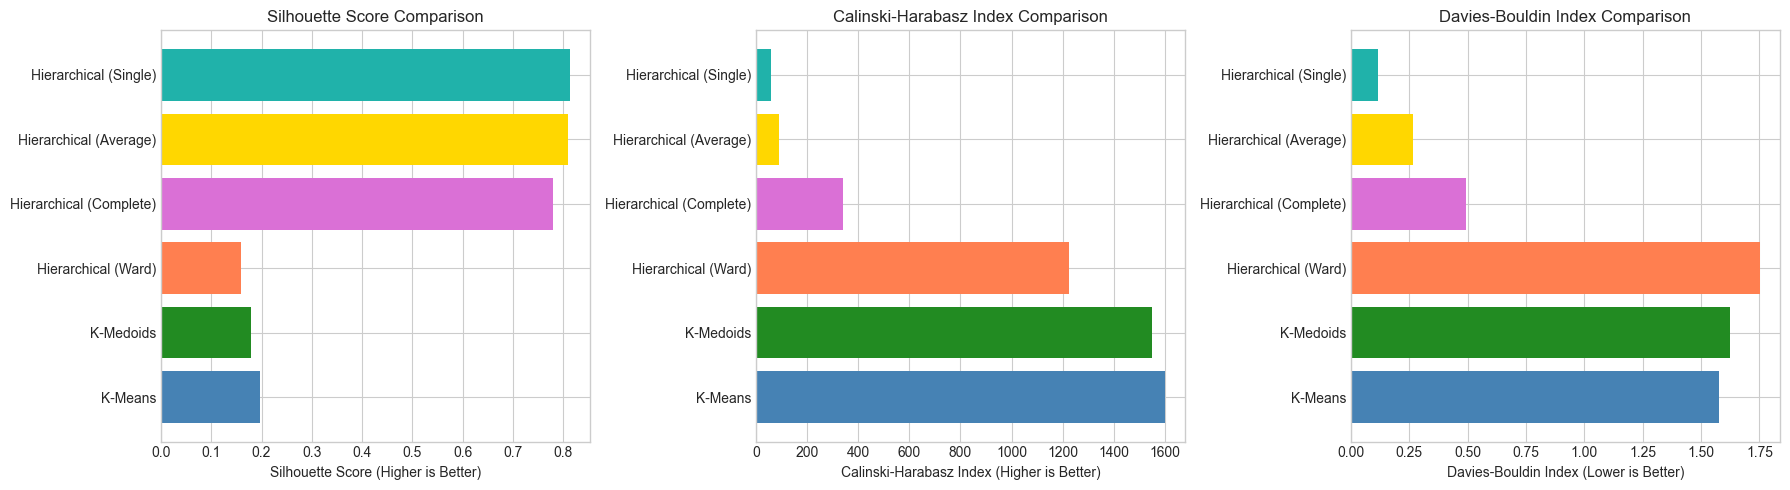

In [57]:
# Bar chart comparison of metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models = [r['Model'] for r in final_comparison]
colors = ['steelblue', 'forestgreen', 'coral', 'orchid', 'gold', 'lightseagreen']

# Silhouette Score
axes[0].barh(models, [r['Silhouette'] for r in final_comparison], color=colors)
axes[0].set_xlabel('Silhouette Score (Higher is Better)')
axes[0].set_title('Silhouette Score Comparison')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Calinski-Harabasz Index
axes[1].barh(models, [r['Calinski-Harabasz'] for r in final_comparison], color=colors)
axes[1].set_xlabel('Calinski-Harabasz Index (Higher is Better)')
axes[1].set_title('Calinski-Harabasz Index Comparison')

# Davies-Bouldin Index
axes[2].barh(models, [r['Davies-Bouldin'] for r in final_comparison], color=colors)
axes[2].set_xlabel('Davies-Bouldin Index (Lower is Better)')
axes[2].set_title('Davies-Bouldin Index Comparison')

plt.tight_layout()
plt.show()

---
# Summary and Conclusions

## Key Findings:

### 1. K-Means Clustering
- **n_clusters**: The elbow method and silhouette analysis help determine the optimal number of clusters
- **init**: 'k-means++' generally provides better and more stable initialization than 'random'
- **n_init**: Higher values (10-20) provide more stable results but increase computation time
- **max_iter**: The algorithm typically converges before reaching the maximum iterations

### 2. K-Medoids Clustering
- More robust to outliers than K-Means since it uses actual data points as centers
- **metric**: Different distance metrics (euclidean, manhattan, cosine) can significantly affect results
- **initialization**: 'k-medoids++' typically provides good initial medoid selection
- Computationally more expensive than K-Means

### 3. Hierarchical Clustering
- **Ward linkage**: Tends to create balanced, compact clusters (often best for general purposes)
- **Complete linkage**: Creates compact clusters, sensitive to outliers
- **Average linkage**: Compromise between ward and single linkage
- **Single linkage**: Can create chain-like clusters, useful for detecting elongated clusters
- Dendrograms provide intuitive visualization of the clustering hierarchy

## Evaluation Metrics Interpretation:
- **Silhouette Score**: Measures how similar objects are to their own cluster vs. other clusters (-1 to 1, higher is better)
- **Calinski-Harabasz Index**: Ratio of between-cluster to within-cluster variance (higher is better)
- **Davies-Bouldin Index**: Average similarity between clusters (lower is better)